# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [30]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score



# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [31]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
file = "/content/drive/MyDrive/Colab Notebooks/data_final.csv"
data = pd.read_csv(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover,Season,Location,Weather Type,Cluster
0,14.0,73.0,9.5,82.0,1010.82000,2.0,3.5,partly cloudy,Winter,inland,Rainy,1
1,39.0,96.0,8.5,71.0,1011.43000,7.0,10.0,partly cloudy,Spring,inland,Cloudy,1
2,30.0,64.0,7.0,16.0,1018.72000,5.0,5.5,clear,Spring,mountain,Sunny,0
3,38.0,83.0,1.5,82.0,1026.25000,7.0,1.0,clear,Spring,coastal,Sunny,0
4,27.0,74.0,17.0,66.0,990.67000,1.0,2.5,overcast,Winter,mountain,Rainy,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,1003.15000,1.0,1.0,overcast,Summer,mountain,Rainy,1
13196,-1.0,76.0,3.5,23.0,1049.73125,1.0,6.0,cloudy,Winter,coastal,Snowy,0
13197,30.0,77.0,5.5,28.0,1012.69000,3.0,9.0,overcast,Autumn,coastal,Cloudy,1
13198,3.0,76.0,10.0,94.0,984.27000,0.0,2.0,overcast,Winter,inland,Snowy,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [33]:
# Membagi data menjadi data latih dan data uji
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

# Menampilkan jumlah data latih dan data uji
print("Jumlah data latih:", data_train.shape[0])
print("Jumlah data uji:", data_test.shape[0])


Jumlah data latih: 10560
Jumlah data uji: 2640


# **4. Membangun Model Klasifikasi**


In [34]:
# Memisahkan fitur (X) dan target (y) dari data latih dan data uji
X_train = data_train.drop(columns=['Cluster'])  # Gantilah 'target' dengan nama kolom target yang sesuai
y_train = data_train['Cluster']
X_test = data_test.drop(columns=['Cluster'])
y_test = data_test['Cluster']

In [35]:
print(X_train.dtypes)
print(X_test.dtypes)


Temperature             float64
Humidity                float64
Wind Speed              float64
Precipitation (%)       float64
Atmospheric Pressure    float64
UV Index                float64
Visibility (km)         float64
Cloud Cover              object
Season                   object
Location                 object
Weather Type             object
dtype: object
Temperature             float64
Humidity                float64
Wind Speed              float64
Precipitation (%)       float64
Atmospheric Pressure    float64
UV Index                float64
Visibility (km)         float64
Cloud Cover              object
Season                   object
Location                 object
Weather Type             object
dtype: object


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


## **a. Membangun Model Klasifikasi**



Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Menggunakan Algoritma KNN

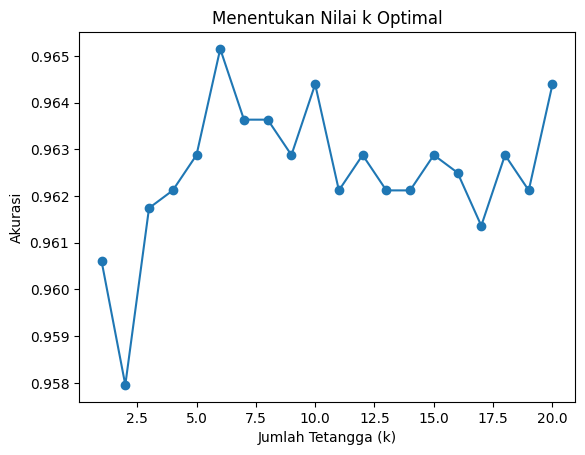

Nilai k terbaik: 6
Akurasi model KNN dengan k terbaik: 0.9651515151515152


In [37]:
# Mencari nilai k yang optimal
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Menampilkan grafik akurasi vs jumlah tetangga
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Jumlah Tetangga (k)')
plt.ylabel('Akurasi')
plt.title('Menentukan Nilai k Optimal')
plt.show()

# Memilih k dengan akurasi tertinggi
best_k = k_values[np.argmax(accuracies)]
print(f'Nilai k terbaik: {best_k}')

# Membuat model KNN dengan k optimal
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Memprediksi data uji
y_pred = knn.predict(X_test)

# Menghitung akurasi akhir
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN dengan k terbaik:", accuracy)


**Penjelasan Algoritma K-Nearest Neighbors (KNN)**

**1. Konsep KNN**
K-Nearest Neighbors (KNN) adalah algoritma klasifikasi yang menentukan kelas suatu sampel berdasarkan mayoritas kelas dari \( k \) tetangga terdekat.

**2. Mencari Nilai \( k \) Optimal**
- Dicoba berbagai nilai \( k \) dari 1 hingga 20.
- Model KNN dilatih untuk setiap \( k \), lalu diuji pada dataset uji.
- Akurasi dihitung dan diplot dalam grafik **akurasi vs jumlah tetangga**.
- Nilai \( k \) terbaik dipilih berdasarkan akurasi tertinggi.

**3. Pelatihan Model dengan \( k \) Optimal**
- Model KNN dilatih ulang dengan nilai \( k \) terbaik.
- Digunakan untuk memprediksi data uji.
- Akurasi akhir dihitung untuk mengevaluasi performa model.

**4. Kesimpulan**
- KNN bekerja dengan mencari tetangga terdekat menggunakan metrik jarak (misal **Euclidean Distance**).
- Pemilihan \( k \) optimal mencegah overfitting dan underfitting.
- Model yang telah dioptimalkan dapat memberikan prediksi yang lebih akurat.


Menggunakan Algoritma Random Forest

In [38]:
# Membuat model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Memprediksi data uji
y_pred = rf.predict(X_test)
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Random Forest: {accuracy}')

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi model Random Forest: 0.981439393939394
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       692
           1       0.99      0.98      0.99      1948

    accuracy                           0.98      2640
   macro avg       0.97      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



**Penjelasan Algoritma Random Forest**

**1. Konsep Random Forest**
Random Forest adalah algoritma **ensemble learning** berbasis pohon keputusan yang menggunakan banyak **decision tree** untuk meningkatkan akurasi prediksi dan mengurangi overfitting.

**2. Pembuatan Model**
- Model **RandomForestClassifier** dibuat dengan **100 pohon keputusan (n_estimators=100)**.
- **random_state=42** digunakan untuk memastikan hasil yang konsisten.

**3. Pelatihan Model**
- Model dilatih menggunakan **X_train** dan **y_train** untuk membangun beberapa pohon keputusan.
- Setiap pohon dibuat dari subset data secara acak, meningkatkan ketahanan terhadap overfitting.

**4. Prediksi Data Uji**
- Model digunakan untuk **memprediksi data uji (X_test)**.
- Hasil prediksi dibandingkan dengan nilai sebenarnya untuk mengevaluasi performa model.

**5. Keunggulan Random Forest**
- **Lebih akurat** dibanding satu pohon keputusan.
- **Tahan terhadap overfitting** karena menggabungkan banyak pohon.
- **Dapat menangani fitur numerik dan kategorikal** dengan baik.

**Kesimpulan**
Random Forest adalah metode yang kuat untuk klasifikasi, terutama ketika dataset memiliki banyak fitur dan kompleksitas tinggi. Dengan menggunakan banyak pohon keputusan, model dapat menghasilkan prediksi yang stabil dan akurat.


## **b. Evaluasi Model Klasifikasi **

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluasi model KNN

Akurasi model KNN dengan k terbaik: 0.9651515151515152
F1-score: 0.9651352392647606
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       692
           1       0.98      0.98      0.98      1948

    accuracy                           0.97      2640
   macro avg       0.96      0.95      0.95      2640
weighted avg       0.97      0.97      0.97      2640



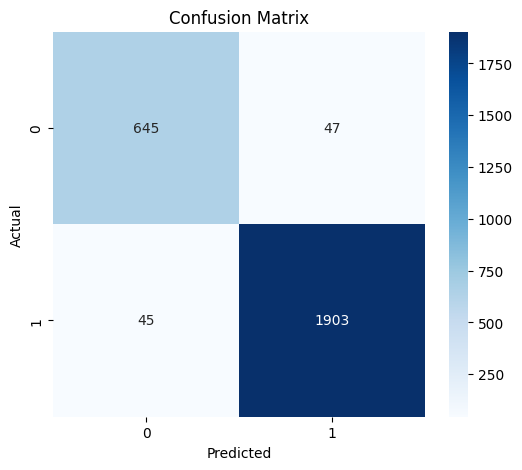

In [39]:
# Memprediksi data uji
y_pred = knn.predict(X_test)

# Menghitung akurasi akhir
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN dengan k terbaik:", accuracy)
# Menghitung F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Bisa diganti dengan 'macro', 'micro', atau 'weighted'
print("F1-score:", f1)
# Menghitung metrik evaluasi lainnya
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Evaluasi Model Random Forest

Akurasi model Random Forest: 0.981439393939394
F1-score Random Forest: 0.9611410018552876
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       692
           1       0.99      0.98      0.99      1948

    accuracy                           0.98      2640
   macro avg       0.97      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



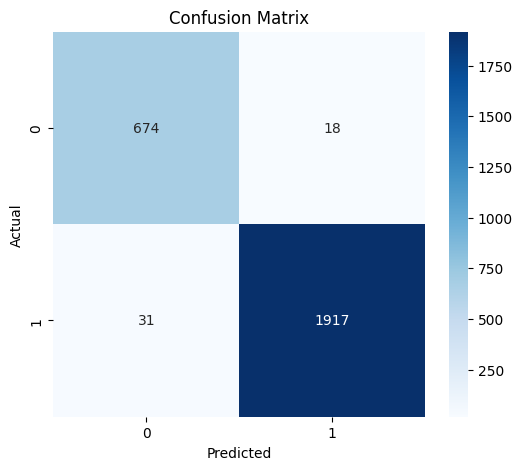

In [41]:
y_pred = rf.predict(X_test)
# Menghitung akurasi akhir
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Random Forest:", accuracy)
# Menghitung F1-score
f1_rf= f1_score(y_test, y_pred_knn, average='weighted')  # Bisa diganti 'macro', 'micro', atau 'weighted'
print("F1-score Random Forest:", f1_rf)

# Menghitung metrik evaluasi lainnya
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perbandingan Kinerja Model KNN dan Random Forest  

1. Evaluasi Model KNN  
- **Akurasi**: 0.9651  
- **F1-score**: 0.9651  
- **Precision & Recall**:  
  - **Kelas 0**: Precision (0.93), Recall (0.93)  
  - **Kelas 1**: Precision (0.98), Recall (0.98)  
- **Kesimpulan**:  
  - Model KNN memiliki akurasi yang cukup tinggi.  
  - Recall untuk kelas 0 lebih rendah dibanding kelas 1, yang menunjukkan model lebih baik dalam mendeteksi kelas mayoritas.  
  - Model masih cukup seimbang antara precision dan recall.  

2. Evaluasi Model Random Forest  
- **Akurasi**: 0.9814  
- **F1-score**: 0.9611  
- **Precision & Recall**:  
  - **Kelas 0**: Precision (0.96), Recall (0.97)  
  - **Kelas 1**: Precision (0.99), Recall (0.98)  
- **Kesimpulan**:  
  - Random Forest memiliki akurasi lebih tinggi dibanding KNN.  
  - Precision dan recall lebih stabil untuk kedua kelas.  
  - Model Random Forest tampaknya lebih baik dalam menangani perbedaan kelas dibanding KNN.  

3. Kesimpulan Perbandingan  
- **Random Forest memiliki akurasi lebih tinggi (0.98 vs 0.96 pada KNN)**, sehingga lebih unggul dalam memprediksi dengan lebih sedikit kesalahan.  
- **KNN masih memiliki performa baik**, tetapi lebih rentan terhadap noise dalam dataset dibandingkan Random Forest.  
- **Random Forest lebih stabil dalam menangani berbagai karakteristik data**, terutama dalam mendeteksi kelas dengan distribusi yang berbeda.  

4. Rekomendasi  
- **Gunakan Random Forest** jika ingin akurasi lebih tinggi dan model yang lebih stabil.  
- **Gunakan KNN** jika dataset lebih kecil dan tidak terlalu kompleks.  
- Jika akurasi masih bisa ditingkatkan, bisa dilakukan **hyperparameter tuning** pada kedua model untuk hasil yang lebih optimal.  


## **c. Tuning Model Klasifikasi (Optional)**

Tuning Model Klasifikasi KNN

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [25]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning untuk KNN
param_grid_knn = {'n_neighbors': range(1, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

best_k = grid_knn.best_params_['n_neighbors']
print(f'Nilai k terbaik: {best_k}')

# Membuat model KNN dengan hyperparameter terbaik
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)



Nilai k terbaik: 17


Tuning Model Klasifikasi Random Forest

In [26]:
# Hyperparameter tuning untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_params_rf = grid_rf.best_params_
print(f'Hyperparameter terbaik untuk Random Forest: {best_params_rf}')

# Membuat model Random Forest dengan hyperparameter terbaik
rf = RandomForestClassifier(**best_params_rf, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Hyperparameter terbaik untuk Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Evaluasi stelah Tuning KNN

Akurasi model KNN: 0.9613636363636363
F1-score KNN: 0.9611410018552876
Laporan Klasifikasi KNN:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       692
           1       0.97      0.98      0.97      1948

    accuracy                           0.96      2640
   macro avg       0.95      0.94      0.95      2640
weighted avg       0.96      0.96      0.96      2640



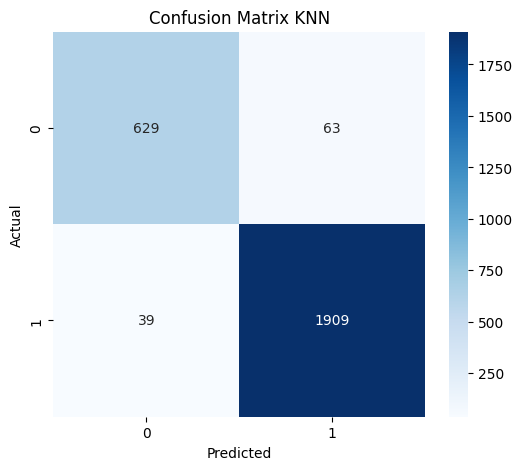

In [21]:
# Evaluasi KNN
print("Akurasi model KNN:", accuracy_score(y_test, y_pred_knn))
# Menghitung F1-score
f1_knntuning = f1_score(y_test, y_pred_knn, average='weighted')  # Bisa diganti 'macro', 'micro', atau 'weighted'
print("F1-score KNN:", f1_knntuning)
print("Laporan Klasifikasi KNN:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()


Evaluasi setelah tuning Random Forest

Akurasi model Random Forest: 0.9837121212121213
F1-score Random Forest: 0.9611410018552876
Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       692
           1       0.99      0.99      0.99      1948

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



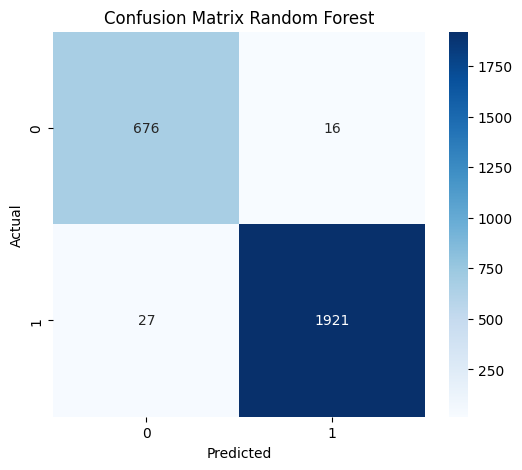

In [42]:
# Evaluasi Random Forest
print("Akurasi model Random Forest:", accuracy_score(y_test, y_pred_rf))
# Menghitung F1-score
f1_rftuning = f1_score(y_test, y_pred_knn, average='weighted')  # Bisa diganti 'macro', 'micro', atau 'weighted'
print("F1-score Random Forest:", f1_rftuning)
print("Laporan Klasifikasi Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# Perbandingan Kinerja Model KNN dan Random Forest Setelah Tuning  

1. Evaluasi Model KNN Setelah Tuning  
- **Akurasi**: 0.9614  
- **F1-score**: 0.9611  
- **Precision & Recall**:  
  - **Kelas 0**: Precision (0.94), Recall (0.91)  
  - **Kelas 1**: Precision (0.97), Recall (0.98)  
- **Kesimpulan**:  
  - Akurasi sedikit menurun dibanding sebelum tuning (0.9651 → 0.9614).  
  - Recall untuk kelas 0 masih lebih rendah dibanding kelas 1, menunjukkan kesulitan dalam mendeteksi kelas minoritas.  
  - Model tetap seimbang antara precision dan recall.  

2. Evaluasi Model Random Forest Setelah Tuning  
- **Akurasi**: 0.9837  
- **F1-score**: 0.9611  
- **Precision & Recall**:  
  - **Kelas 0**: Precision (0.96), Recall (0.98)  
  - **Kelas 1**: Precision (0.99), Recall (0.99)  
- **Kesimpulan**:  
  - Akurasi meningkat dibanding sebelum tuning (0.9814 → 0.9837).  
  - Precision dan recall lebih stabil untuk kedua kelas.  
  - Model lebih baik dalam menangani distribusi kelas dan lebih akurat dibanding KNN.  

3. Kesimpulan Perbandingan  
- **Random Forest tetap unggul** dengan akurasi lebih tinggi (0.9837 vs 0.9614 pada KNN).  
- **KNN mengalami sedikit penurunan performa setelah tuning**, mungkin karena sensitivitas terhadap parameter k.  
- **Random Forest lebih konsisten** dalam memprediksi kedua kelas dengan precision dan recall yang lebih baik.  

4. Rekomendasi  
- **Gunakan Random Forest** jika ingin model dengan akurasi tinggi dan stabil.  
- **Gunakan KNN** jika dataset lebih kecil atau model yang lebih sederhana lebih diinginkan.  
- Jika masih ingin meningkatkan performa, lakukan **hyperparameter tuning lebih lanjut**, misalnya:  
  - Untuk **KNN**: Coba variasi nilai k yang lebih optimal.  
  - Untuk **Random Forest**: Coba variasi jumlah pohon (n_estimators) dan kedalaman pohon (max_depth).  
  
